In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from scipy import stats
import math
import re
import csv
from sklearn import linear_model

## 1.  导入数据并清洗

In [2]:
path = "./export.csv"
names = ['start', 'last', 'delet1', 'type', 'delet2', 'subtype', 'remark', 'tag', 'state']
data = pd.read_csv(path, names = names, skiprows = [0])
data.head()

,start,last,delet1,type,delet2,subtype,remark,tag,state
0,2017-02-09 00:00,450,未分类,睡觉,未分类,NaN,NaN,NaN,已完成
1,2017-02-09 07:30,30,未分类,杂事,未分类,吃饭,NaN,NaN,已完成
2,2017-02-09 08:00,240,未分类,工作,未分类,家教,NaN,NaN,已完成
3,2017-02-09 12:00,30,未分类,杂事,未分类,吃饭,NaN,NaN,已完成
4,2017-02-09 12:30,30,未分类,睡觉,未分类,午睡,NaN,NaN,已完成


In [3]:
df = pd.DataFrame(data)
df = df.drop(['delet1', 'delet2', 'tag', 'state'], axis = 1)
print(df.shape)
df.head()

(6516, 5)


,start,last,type,subtype,remark
0,2017-02-09 00:00,450,睡觉,NaN,NaN
1,2017-02-09 07:30,30,杂事,吃饭,NaN
2,2017-02-09 08:00,240,工作,家教,NaN
3,2017-02-09 12:00,30,杂事,吃饭,NaN
4,2017-02-09 12:30,30,睡觉,午睡,NaN


In [4]:
date = []
start = []
for i in range(df.shape[0]):
    date.append(df['start'][i].split(' ')[0])
    start.append(df['start'][i].split(' ')[1])
print(date[:5], start[:5])

['2017-02-09', '2017-02-09', '2017-02-09', '2017-02-09', '2017-02-09'] ['00:00', '07:30', '08:00', '12:00', '12:30']


In [5]:
date_start = pd.DataFrame({'date': date, 'start': start})
print(date_start.shape)
date_start.head()

(6516, 2)


,date,start
0,2017-02-09,00:00
1,2017-02-09,07:30
2,2017-02-09,08:00
3,2017-02-09,12:00
4,2017-02-09,12:30


In [6]:
df = date_start.join(df.drop(columns = 'start'))
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(6516, 6)

In [7]:
df.head()

,date,start,last,type,subtype,remark
0,2017-02-09,00:00,450,睡觉,NaN,NaN
1,2017-02-09,07:30,30,杂事,吃饭,NaN
2,2017-02-09,08:00,240,工作,家教,NaN
3,2017-02-09,12:00,30,杂事,吃饭,NaN
4,2017-02-09,12:30,30,睡觉,午睡,NaN


## 2.  描述统计

In [8]:
print(df['last'].describe())
data = df['last']
print("众数：{0}，计数：{1}".format(stats.mode(data)[0],stats.mode(data)[1]))    #众数

count    6516.000000
mean       95.232505
std       106.216357
min        15.000000
25%        30.000000
50%        60.000000
75%       120.000000
max       690.000000
Name: last, dtype: float64
众数：[30]，计数：[2331]


In [9]:
print("极差：{0}、方差：{1}、标准差：{2}、变异系数：{3}".format(np.ptp(data), np.var(data), 
                                          np.std(data), np.mean(data) / np.std(data)))

极差：675、方差：11280.183050264517、标准差：106.2082061342932、变异系数：0.8966586299709874


In [10]:
stats.norm.fit(df['last'])    #用正态分布进行拟合

(95.23250460405157, 106.20820613429413)

### 2.1  对时长进行频率统计

In [88]:
dataFreq = {}
for i in data: 
        dataFreq[i] = dataFreq.get(i, 0) + 1
dataFreq.items()
time = list(dataFreq.keys())
freq = list(dataFreq.values())

count = []
for i in range(len(time)):
    count.append([time[i], freq[i]])
count.sort()
for i in range(len(time)):
    time[i] = count[i][0]
    freq[i] = count[i][1]
print(time, freq)

[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 540, 570, 600, 630, 690] [448, 2331, 135, 1121, 89, 646, 71, 427, 45, 215, 29, 169, 20, 91, 15, 65, 7, 50, 4, 46, 2, 35, 4, 89, 6, 101, 13, 104, 17, 55, 15, 26, 3, 11, 4, 3, 1, 2, 1]


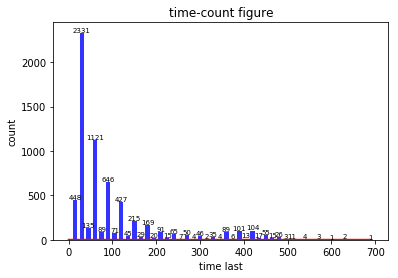

In [97]:
plt.bar(time, freq, width = 10,align='center',color = 'b',alpha=0.8)
plt.xlabel('time last')
plt.ylabel('count')
plt.title('time-count figure')

for a,b in zip(time,freq):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

x = np.linspace(0, 690, 10000)
y = stats.norm.pdf(x, 95.2325, 106.2082)

plt.plot(x, y, 'r-', lw = 2)
    
plt.show()

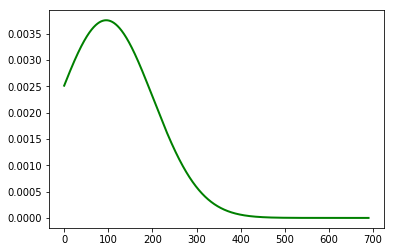

In [96]:
x = np.linspace(0, 690, 10000)
y = stats.norm.pdf(x, 95.2325, 106.2082)

plt.plot(x, y, 'g-', lw = 2)
    
plt.show()

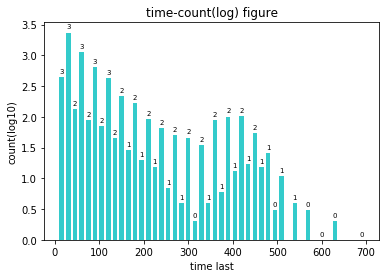

In [98]:
plt.bar(time, np.log10(freq), width = 10,align='center',color = 'c',alpha=0.8)    #转为对数
plt.xlabel('time last')
plt.ylabel('count(log10)')
plt.title('time-count(log) figure')

for a,b in zip(time,np.log10(freq)):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

plt.show()

## 3.频域分析

In [12]:
x = np.array(df['last'])
smp_rate = 1 / 15

array([450,  30, 240, ..., 150,  45,  60])

In [13]:
wave = np.cos(x)
y = np.fft.fft(wave)
y.shape

(6516,)

/Users/lee_excited/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


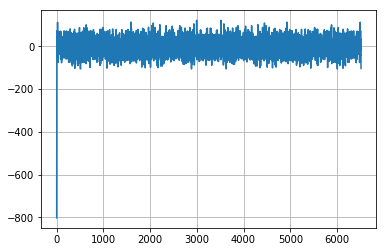

In [14]:
plt.plot(y)
plt.grid()
plt.show()

## 高阶玩法